## **1.평가방법 및 규칙**

1. 평가
평가산식 : MAE
Public 평가 : 23년 1월 1일 ~ 23년 4월 30일
Private 평가 : 23년 1월 1일 ~ 23년 12월 24일


2. 참여 규칙
개인으로만 참여 가능
개인 참가 방법: 팀 신청 없이, 자유롭게 제출 창에서 제출 가능
 

3. 외부 데이터 및 사전 학습 모델
외부 데이터 사용 불가
사전 학습 모델(Pre-trained Model) 사용 가능


4. AutoML 패키지
모든 AutoML 패키지 사용 불가능


5. 유저평가
수상 인증서를 원하는 팀은 먼저 유저 평가를 받아야 합니다.
Private 순위 공개 후, 코드 제출 기간 내 코드 공유 페이지에 코드 업로드
제목에 Private 순위와 사용한 모델, 코드에 대한 keyword 기재
예시) Private 1위, LGBM 모델, 00전처리 기법 활용

대회 참가자는 공개된 코드 평가
코드 오류, 외부 데이터 사용 등 코멘트를 댓글로 작성
 

6. 유의 사항
1일 최대 제출 횟수: 5회
사용 가능 언어: Python, R
현재는 2022.12.31 23:59:59로 설정됨
따라서, 2023.01.01 00:00:00부터 알 수 있는 특성을 활용하는 경우 Data Leakage로 실격 (리더보드 기록 삭제)
2023.01.01 00:00:00부터 발생한 모든 사건은 전혀 알 수 없다고 가정하여 진행해야함
Pseudo Labeling은 사용 불가
제공된 데이터를 제외한 모든 외부데이터 활용 금지
Data Leakage (참고 : Data Leakage에 대한 개인적인 정리) 혹은 규칙 위반이 의심되는 경우 코드를 요청할 수 있음
최종 순위는 선택된 파일 중에서 채점되므로 참가자는 제출 창에서 자신이 최종적으로 채점 받고 싶은 파일 1개를 선택해야 함
대회 직후 공개되는 Private 랭킹은 최종 순위가 아니며 코드 검증 후 수상자가 결정됨
데이콘은 부정 제출 행위를 금지하며 데이콘 대회 부정 제출 이력 있을 시 평가 제한 (참조: https://dacon.io/notice/notice/13)
 

6. 토론(질문)
대회 운영 및 데이터 이상에 관련된 질문 외에 답변하지 않고 있음
			* 데이콘 답변을 희망하는 경우 토론 제목에 [DACON 답변 요청] 문구를 넣어야 함

			예) [DACON 답변 요청] 시상식은 언제 열리나요?

## **2. 데이터 불러오기 및 데이터 확인**

In [1]:
import pandas as pd

In [2]:
temp_data = pd.read_csv('./open/train.csv')
print(temp_data.info())
temp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB
None


,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


### object 형식을 datetime으로 바꾸기

In [5]:
temp_data['일시'] = pd.to_datetime(temp_data['일시'])
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


In [6]:
temp_data.head(3)

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0


In [11]:
display(temp_data['일사합'].isnull().sum())
display(temp_data['일조율'].isnull().sum())

4862

366

## **3. 시각화**

- 평균기온을 예측하는 것 = 평균기온을 y 로 두고 시각화

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

### 1) 평균기온y와 x 간 관계 시각화

In [12]:
temp_data_x = temp_data.drop('평균기온', axis=1)
temp_data_y = temp_data[['평균기온']]

temp_data_x.shape, temp_data_y.shape

((23011, 10), (23011, 1))

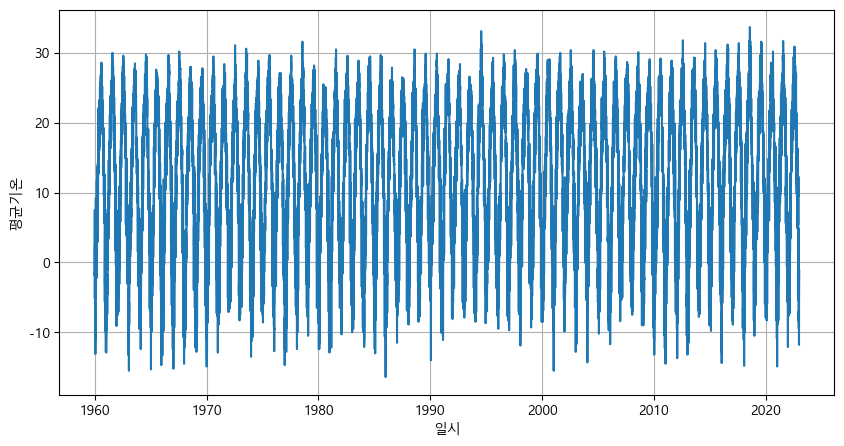

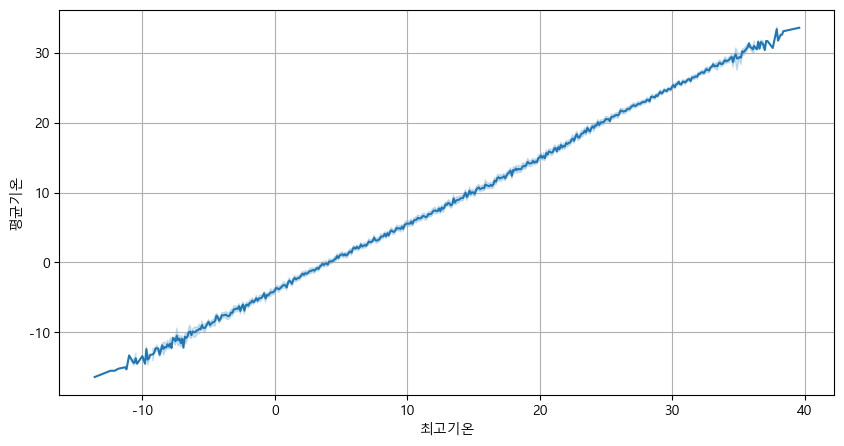

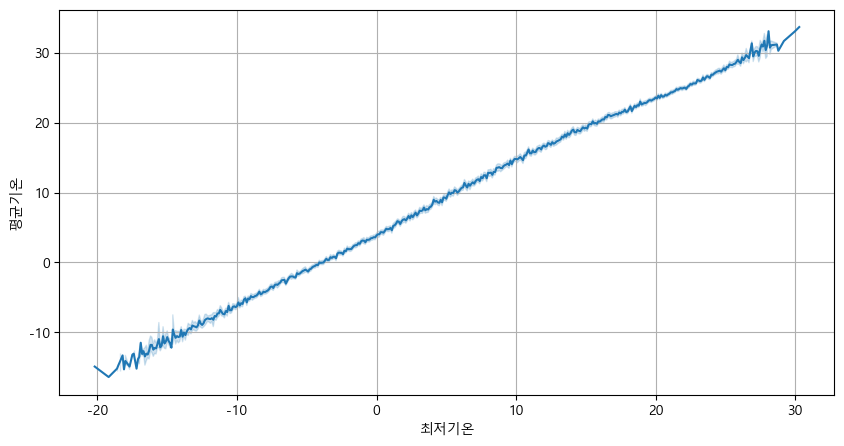

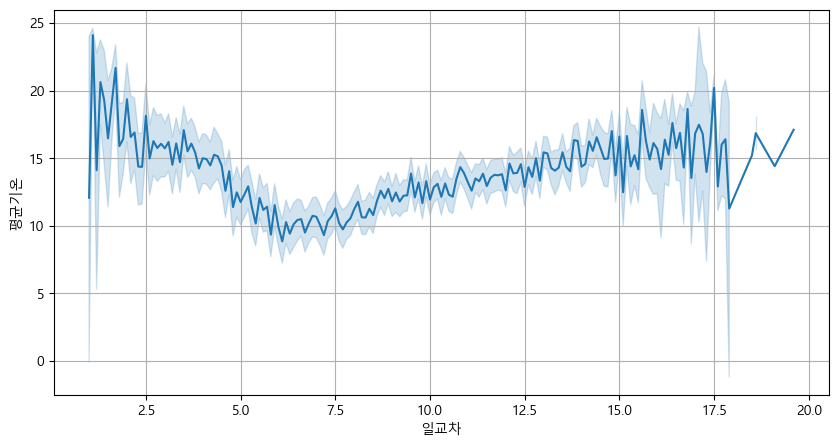

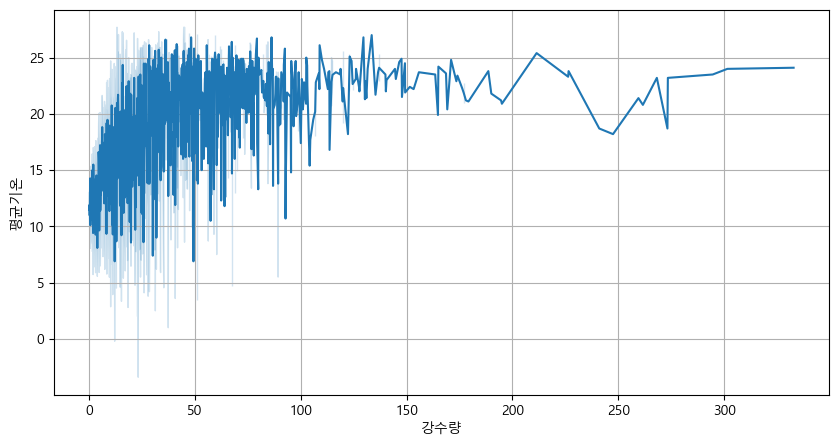

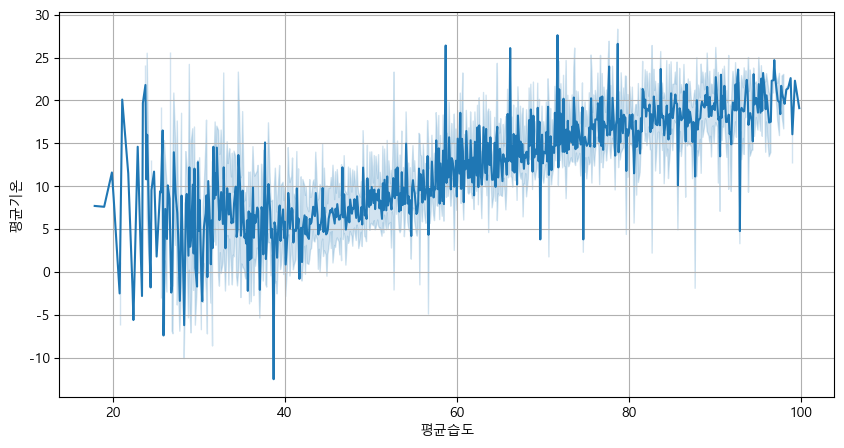

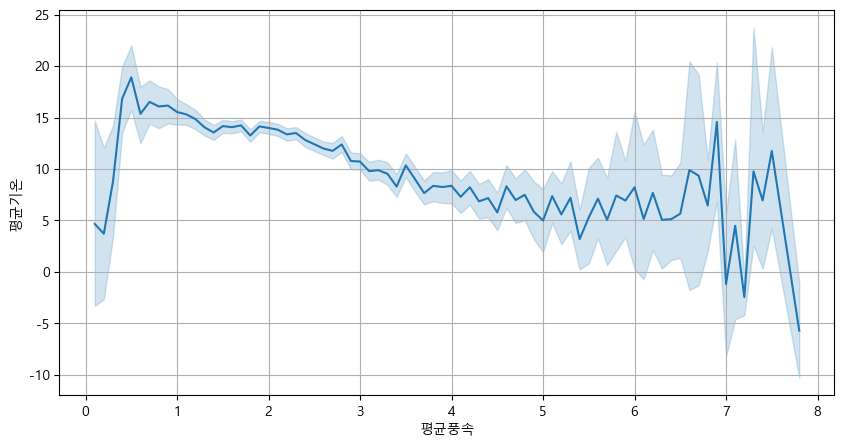

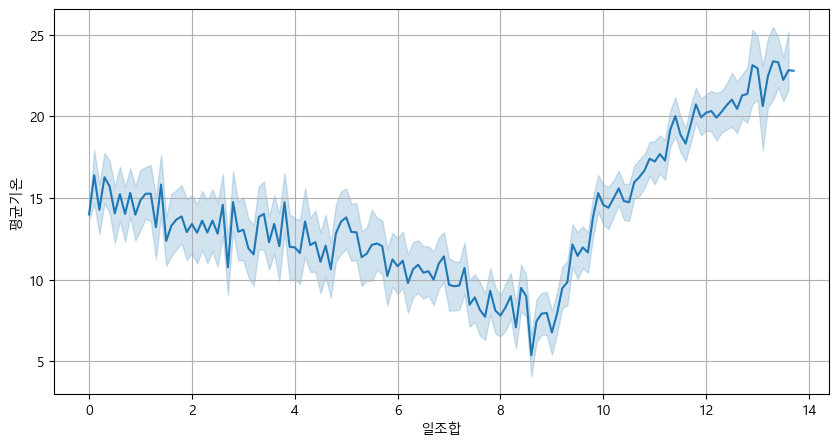

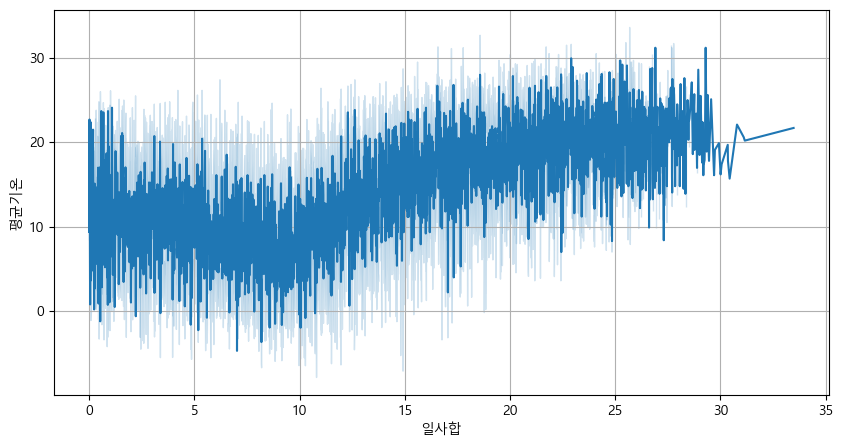

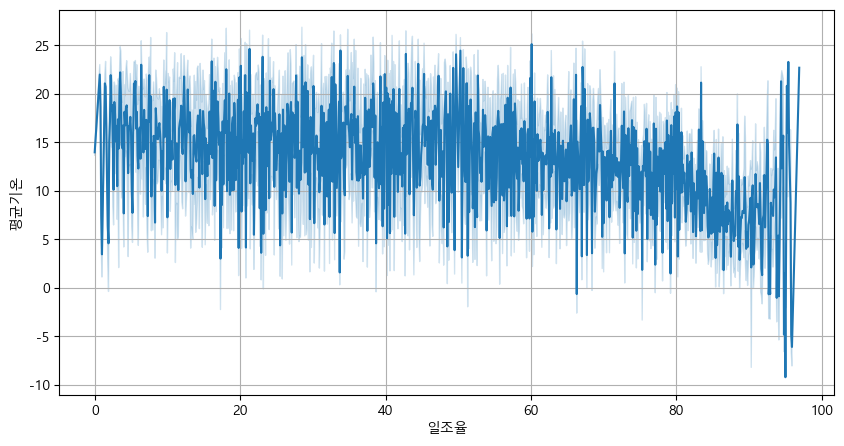

In [18]:
for x in list(temp_data_x.columns):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.figure()
    sb.lineplot(data=temp_data, x=x, y='평균기온')
    plt.grid()
    plt.show()
    plt.close()


> 평균기온은 '최고기온'과 '최저기온'과 상관관계가 있는 것으로 보임

### 2) x끼리의 상관관계 분석 (히트맵)

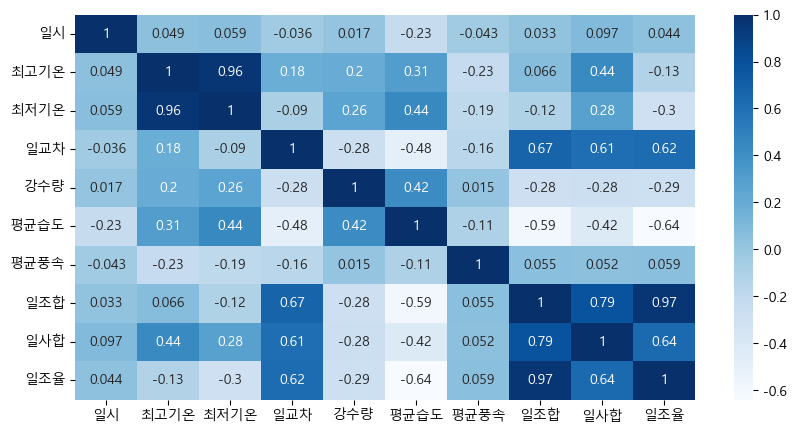

In [22]:
sb.heatmap(data=temp_data_x.corr(), cmap='Blues', annot=True)
plt.show()
plt.close()

> 상관관계가 높다. 
- 최고기온과 최저기온
- 일교차와 일조합, 일사합, 일조율
- 일조합과 일사합, 일조율
- 일사합과 일조율 

### 3) VIF 확인해보기

> 모델링의 목적이 예측인 경우에 다중공선성을 신경 쓸 필요가 없습니다. 다중공선성을 조심해야되는 이유는 해석상의 오류 때문이며, 예측 성능에는 큰 지장을 주지 않는다고 하네요. 다만, 선형회귀계수 추정 시 불안정해진다는 점에 유의해야 합니다

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
corr_df = temp_data_x.drop('일시', axis=1)

In [30]:
corr_df.values

array([[ 2.2 , -5.2 ,  7.4 , ...,  6.7 ,   nan,   nan],
       [ 1.2 , -5.6 ,  6.8 , ...,  0.  ,   nan,   nan],
       [ 8.7 , -2.1 , 10.8 , ...,  0.  ,   nan,   nan],
       ...,
       [ 2.1 , -7.8 ,  9.9 , ...,  9.  , 10.88, 93.8 ],
       [ 2.3 , -4.4 ,  6.7 , ...,  7.9 , 10.84, 82.3 ],
       [ 2.1 , -5.1 ,  7.2 , ...,  1.1 ,  4.16, 11.5 ]])

In [28]:
vif = pd.DataFrame()

vif['VIF Factor'] = [variance_inflation_factor(temp_data_x.values, i) for i in range(temp_data_x.shape[1])]
vif['features'] = temp_data_x.columns

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''